In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("train.txt", sep="\t")

In [5]:
data

,id,turn1,turn2,turn3,label
0,0,Don't worry I'm girl,hmm how do I know if you are,What's ur name?,others
1,1,When did I?,saw many times i think -_-,No. I never saw you,angry
2,2,By,by Google Chrome,Where you live,others
3,3,U r ridiculous,I might be ridiculous but I am telling the truth.,U little disgusting whore,angry
4,4,Just for time pass,wt do u do 4 a living then,Maybe,others
...,...,...,...,...,...
30155,30155,I don't work,I could take your shift,I am a student,others
30156,30156,I'm not getting you 😭😭😭,Why are you crying??,Because you are not making any sense,sad
30157,30157,Haha,"no, seriously. What is up with that o-o",Had your breakfast?,others
30158,30158,Do you sing?,yea a lil,Nice,others


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30160 entries, 0 to 30159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30160 non-null  int64 
 1   turn1   30160 non-null  object
 2   turn2   30160 non-null  object
 3   turn3   30160 non-null  object
 4   label   30160 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


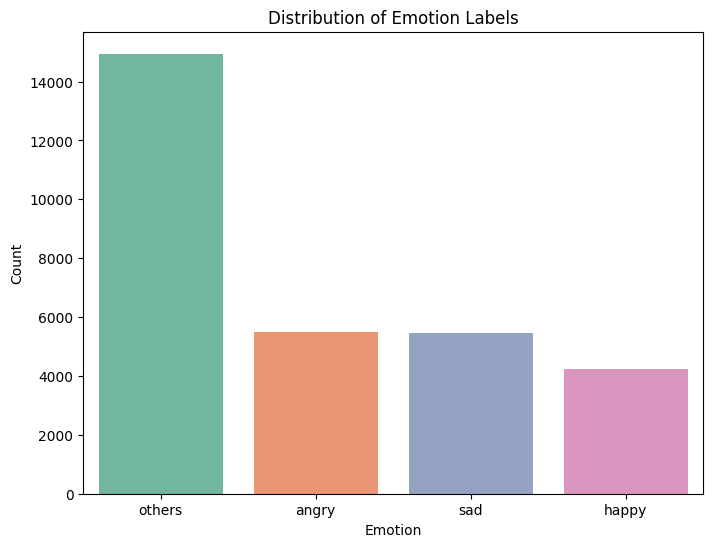

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [8]:
data['Word_count1'] = data['turn1'].apply(lambda x: len(str(x).split()))
data['Word_count2'] = data['turn2'].apply(lambda x: len(str(x).split()))
data['Word_count3'] = data['turn3'].apply(lambda x: len(str(x).split()))

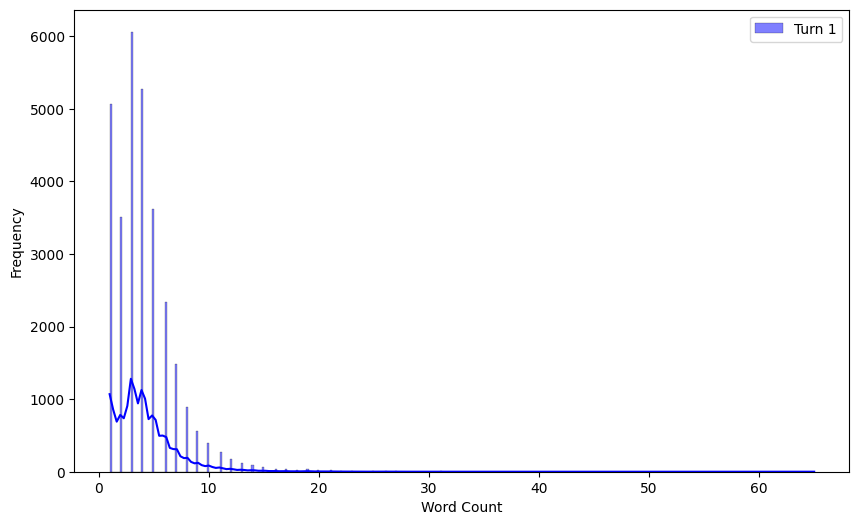

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Word_count1'], kde=True, color='blue', label='Turn 1')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

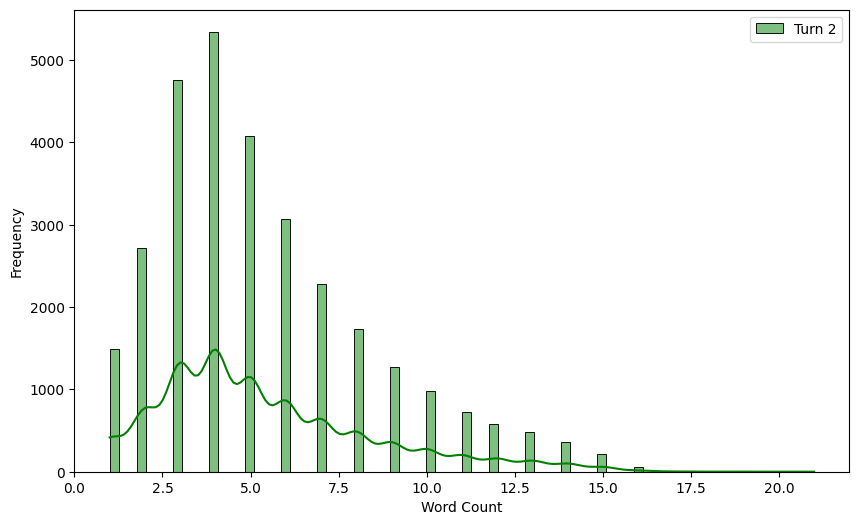

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Word_count2'], kde=True, color='green', label='Turn 2')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

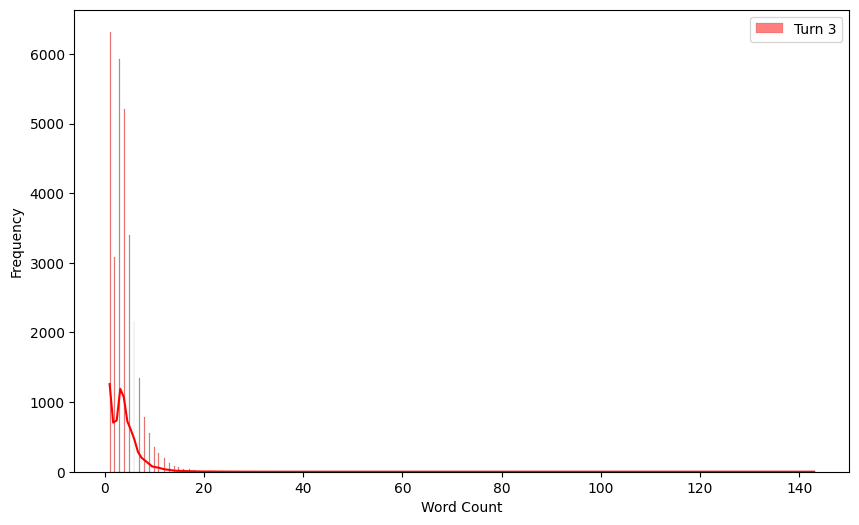

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Word_count3'], kde=True, color='red', label='Turn 3')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
df = data.copy()

In [13]:
df.drop(columns=["id"], inplace=True)
df

,turn1,turn2,turn3,label,Word_count1,Word_count2,Word_count3
0,Don't worry I'm girl,hmm how do I know if you are,What's ur name?,others,4,8,3
1,When did I?,saw many times i think -_-,No. I never saw you,angry,3,6,5
2,By,by Google Chrome,Where you live,others,1,3,3
3,U r ridiculous,I might be ridiculous but I am telling the truth.,U little disgusting whore,angry,3,10,4
4,Just for time pass,wt do u do 4 a living then,Maybe,others,4,8,1
...,...,...,...,...,...,...,...
30155,I don't work,I could take your shift,I am a student,others,3,5,4
30156,I'm not getting you 😭😭😭,Why are you crying??,Because you are not making any sense,sad,5,4,7
30157,Haha,"no, seriously. What is up with that o-o",Had your breakfast?,others,1,8,3
30158,Do you sing?,yea a lil,Nice,others,3,3,1


In [14]:
df.describe()

,Word_count1,Word_count2,Word_count3
count,30160.000000,30160.000000,30160.000000
mean,4.103050,5.405172,3.971684
std,2.913941,3.075510,3.093693
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000
50%,4.000000,5.000000,3.000000
75%,5.000000,7.000000,5.000000
max,65.000000,21.000000,143.000000


In [15]:
df = df[
    (df['Word_count1'] <= df['Word_count1'].quantile(0.95)) &
    (df['Word_count2'] <= df['Word_count2'].quantile(0.95)) &
    (df['Word_count3'] <= df['Word_count3'].quantile(0.95))
]

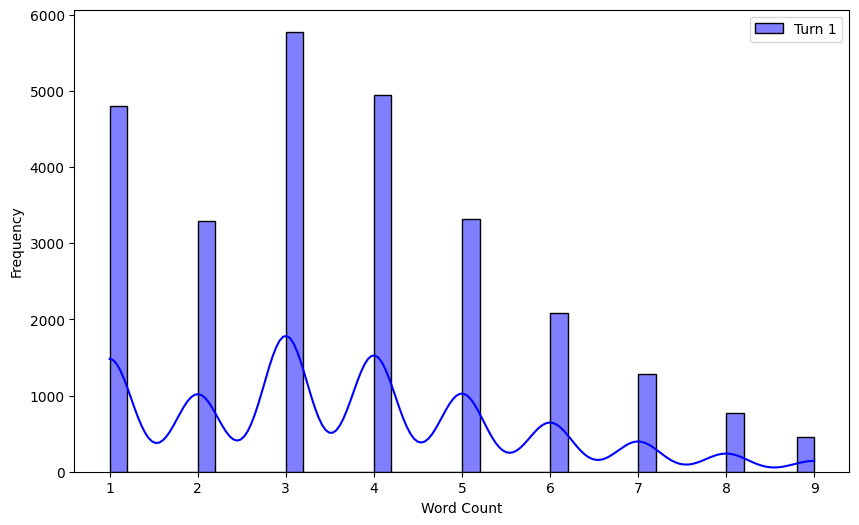

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Word_count1'], kde=True, color='blue', label='Turn 1')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

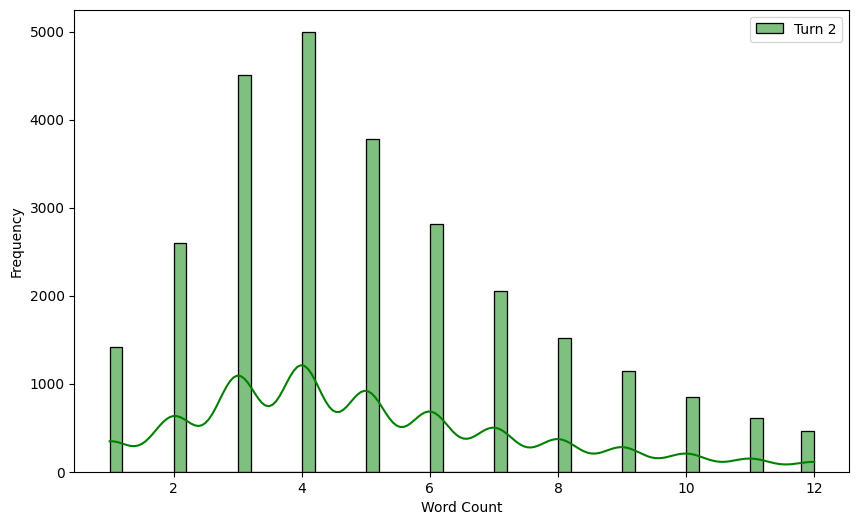

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Word_count2'], kde=True, color='green', label='Turn 2')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

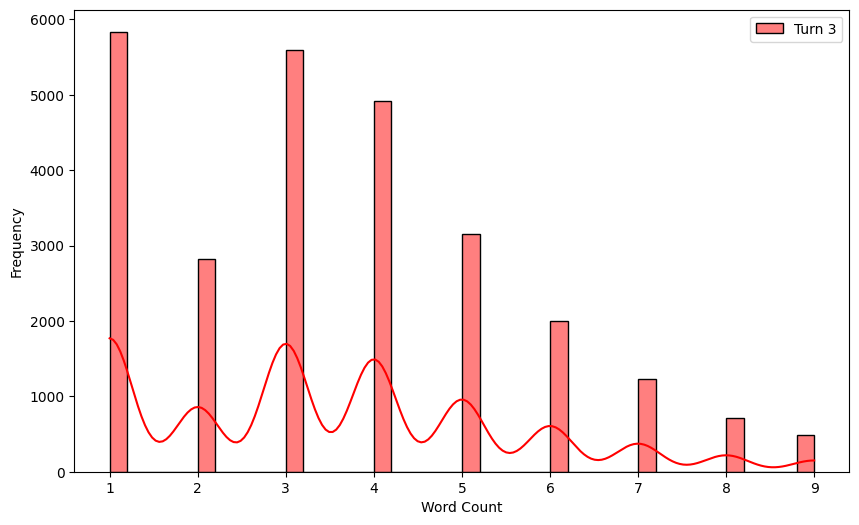

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Word_count3'], kde=True, color='red', label='Turn 3')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [19]:
df.drop(columns=["Word_count1","Word_count2","Word_count3"])

,turn1,turn2,turn3,label
0,Don't worry I'm girl,hmm how do I know if you are,What's ur name?,others
1,When did I?,saw many times i think -_-,No. I never saw you,angry
2,By,by Google Chrome,Where you live,others
3,U r ridiculous,I might be ridiculous but I am telling the truth.,U little disgusting whore,angry
4,Just for time pass,wt do u do 4 a living then,Maybe,others
...,...,...,...,...
30155,I don't work,I could take your shift,I am a student,others
30156,I'm not getting you 😭😭😭,Why are you crying??,Because you are not making any sense,sad
30157,Haha,"no, seriously. What is up with that o-o",Had your breakfast?,others
30158,Do you sing?,yea a lil,Nice,others


In [20]:
df.isnull().sum()

turn1          0
turn2          0
turn3          0
label          0
Word_count1    0
Word_count2    0
Word_count3    0
dtype: int64

In [21]:
df["convo"] = df["turn1"]+" "+df["turn2"]+" "+df["turn3"]
df["convo"]

C:\Users\dipen\AppData\Local\Temp\ipykernel_27052\3810595623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["convo"] = df["turn1"]+" "+df["turn2"]+" "+df["turn3"]


0        Don't worry  I'm girl hmm how do I know if you...
1        When did I? saw many times i think -_- No. I n...
2                       By by Google Chrome Where you live
3        U r ridiculous I might be ridiculous but I am ...
4        Just for time pass wt do u do 4 a living then ...
                               ...                        
30155    I don't work I could take your shift I am a st...
30156    I'm not getting you 😭😭😭 Why are you crying?? B...
30157    Haha no, seriously. What is up with that o-o H...
30158                          Do you sing? yea a lil Nice
30159    Me to People be driving me crazy Come on sleep...
Name: convo, Length: 26759, dtype: object

In [22]:
df

,turn1,turn2,turn3,label,Word_count1,Word_count2,Word_count3,convo
0,Don't worry I'm girl,hmm how do I know if you are,What's ur name?,others,4,8,3,Don't worry I'm girl hmm how do I know if you...
1,When did I?,saw many times i think -_-,No. I never saw you,angry,3,6,5,When did I? saw many times i think -_- No. I n...
2,By,by Google Chrome,Where you live,others,1,3,3,By by Google Chrome Where you live
3,U r ridiculous,I might be ridiculous but I am telling the truth.,U little disgusting whore,angry,3,10,4,U r ridiculous I might be ridiculous but I am ...
4,Just for time pass,wt do u do 4 a living then,Maybe,others,4,8,1,Just for time pass wt do u do 4 a living then ...
...,...,...,...,...,...,...,...,...
30155,I don't work,I could take your shift,I am a student,others,3,5,4,I don't work I could take your shift I am a st...
30156,I'm not getting you 😭😭😭,Why are you crying??,Because you are not making any sense,sad,5,4,7,I'm not getting you 😭😭😭 Why are you crying?? B...
30157,Haha,"no, seriously. What is up with that o-o",Had your breakfast?,others,1,8,3,"Haha no, seriously. What is up with that o-o H..."
30158,Do you sing?,yea a lil,Nice,others,3,3,1,Do you sing? yea a lil Nice


In [23]:
df["convo"] = df["convo"].apply(lambda x: x.lower())
df

C:\Users\dipen\AppData\Local\Temp\ipykernel_27052\471105820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["convo"] = df["convo"].apply(lambda x: x.lower())


,turn1,turn2,turn3,label,Word_count1,Word_count2,Word_count3,convo
0,Don't worry I'm girl,hmm how do I know if you are,What's ur name?,others,4,8,3,don't worry i'm girl hmm how do i know if you...
1,When did I?,saw many times i think -_-,No. I never saw you,angry,3,6,5,when did i? saw many times i think -_- no. i n...
2,By,by Google Chrome,Where you live,others,1,3,3,by by google chrome where you live
3,U r ridiculous,I might be ridiculous but I am telling the truth.,U little disgusting whore,angry,3,10,4,u r ridiculous i might be ridiculous but i am ...
4,Just for time pass,wt do u do 4 a living then,Maybe,others,4,8,1,just for time pass wt do u do 4 a living then ...
...,...,...,...,...,...,...,...,...
30155,I don't work,I could take your shift,I am a student,others,3,5,4,i don't work i could take your shift i am a st...
30156,I'm not getting you 😭😭😭,Why are you crying??,Because you are not making any sense,sad,5,4,7,i'm not getting you 😭😭😭 why are you crying?? b...
30157,Haha,"no, seriously. What is up with that o-o",Had your breakfast?,others,1,8,3,"haha no, seriously. what is up with that o-o h..."
30158,Do you sing?,yea a lil,Nice,others,3,3,1,do you sing? yea a lil nice


In [24]:
X = df["convo"]
y = df["label"]

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vec = TfidfVectorizer(stop_words="english")
encoder = LabelEncoder()
X_vec = vec.fit_transform(X)
y_encoded = encoder.fit_transform(y)

In [26]:
X_vec, y_encoded

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 124039 stored elements and shape (26759, 12071)>,
 array([2, 0, 2, ..., 2, 2, 2]))

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_vec, y_encoded, test_size=0.2, random_state=33)

In [28]:
accuracy = {}

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [30]:
accuracy["RF"] = accuracy_score(y_test, y_pred)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       917
           1       0.73      0.59      0.65       784
           2       0.76      0.89      0.82      2694
           3       0.78      0.61      0.69       957

    accuracy                           0.78      5352
   macro avg       0.78      0.72      0.74      5352
weighted avg       0.78      0.78      0.77      5352



In [32]:
confusion_matrix(y_test, y_pred)

array([[ 717,   13,  147,   40],
       [  17,  459,  289,   19],
       [  65,  134, 2394,  101],
       [  41,   24,  308,  584]], dtype=int64)

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

c:\Users\dipen\OneDrive\Desktop\Qriocity\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
accuracy["LogReg"] = accuracy_score(y_test, y_pred)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       917
           1       0.75      0.49      0.60       784
           2       0.73      0.91      0.81      2694
           3       0.79      0.58      0.67       957

    accuracy                           0.76      5352
   macro avg       0.78      0.67      0.71      5352
weighted avg       0.76      0.76      0.75      5352



In [36]:
confusion_matrix(y_test, y_pred)

array([[ 645,   15,  217,   40],
       [  11,  386,  364,   23],
       [  59,   90, 2459,   86],
       [  40,   21,  343,  553]], dtype=int64)

In [37]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [38]:
accuracy["SVM"] = accuracy_score(y_test, y_pred)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       917
           1       0.76      0.58      0.66       784
           2       0.75      0.90      0.82      2694
           3       0.80      0.57      0.67       957

    accuracy                           0.77      5352
   macro avg       0.79      0.70      0.74      5352
weighted avg       0.78      0.77      0.76      5352



In [40]:
confusion_matrix(y_test, y_pred)

array([[ 703,   17,  162,   35],
       [  16,  453,  301,   14],
       [  75,  102, 2427,   90],
       [  47,   25,  338,  547]], dtype=int64)

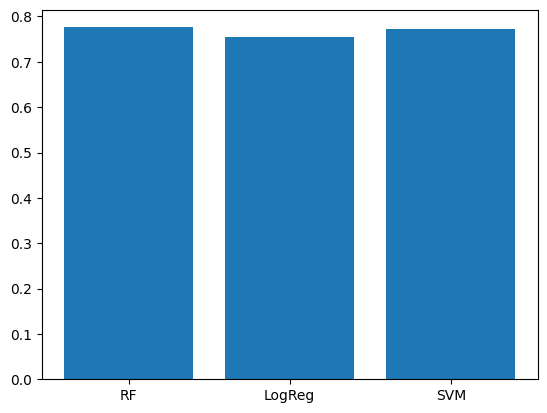

In [43]:
import matplotlib.pyplot as plt

plt.bar(accuracy.keys(), accuracy.values())
plt.show()